In [2]:
import numpy as np 
from matplotlib import pyplot as plt 


La fonction d'utilité est: 
$$u(X,Y) = \left(X^{\rho} + Y^{\rho} \right)^{\tfrac{1}{\rho}} $$

In [3]:
def u(x,y,rho):
    sub = (x**rho) + (y**rho)
    return sub**(1/rho)
def mu_x(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(x**(rho-1.0))
def mu_y(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(y**(rho-1.0))
def tms(x,y,rho):
    return - (x/y)**(rho-1.0)
def indf(v,x,rho):
    return (v**rho - x**rho)**(1/rho)


We have seen that a necessary condition for an optimum is  $|TMS| = \tfrac{p_X}{p_Y}$. So, 

$$ \frac{X}{Y} = \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}} $$

We are missing the budget constraint to fix the quantities. We have :

$$ p_X \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}}Y + p_Y Y = I $$

Therefore, if we denote $r = \frac{\rho}{\rho-1}$ we obtain: 

$$ \left(p_X^r p_Y^{1-r} + p_Y \right) Y = I $$



$$ Y^* = \frac{p_Y^{r-1}}{ p_X^r + p_Y^r }I $$

and 


$$ X^* = \frac{p_X^{r-1}}{ p_X^r + p_Y^r }I $$

In [4]:
def xstar(px,py,I,rho):
  r = rho/(rho-1)
  return (px**(r-1)/(px**r + py**r))*I 
def ystar(px,py,I,rho):
  r = rho/(rho-1)
  return (py**(r-1)/(px**r + py**r))*I 
def vstar(px,py,I,rho):
  x = xstar(px,py,I,rho)
  y = ystar(px,py,I,rho)
  return u(x,y,rho)


In [5]:
px = 1
py = 1
I = 100
px_hat = 2
rho = 0.5

In [6]:
xref,yref = xstar(px,py,I,rho),ystar(px,py,I,rho)

In [7]:
vref = vstar(px,py,I,rho)

In [8]:
xhat,yhat = xstar(px_hat,py,I,rho),ystar(px_hat,py,I,rho)

In [9]:
vhat = vstar(px_hat,py,I,rho)

In [14]:
Is = np.linspace(50,200,100)

In [15]:
vhats = [vstar(px_hat,py,i,rho) for i in Is]

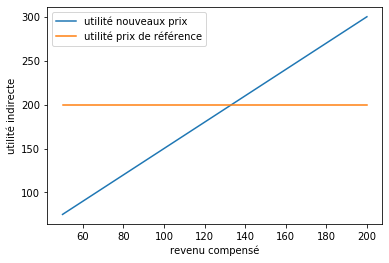

In [19]:
plt.figure()
plt.plot(Is,vhats,label='utilité nouveaux prix')
plt.plot(Is,vref*np.ones(100),label='utilité prix de référence')
plt.xlabel('revenu compensé')
plt.ylabel('utilité indirecte')
plt.legend()
plt.show()

In [25]:
def slack(cmp,px,dpx,py,I,rho):
    return vstar(px,py,I,rho) - vstar(px+dpx,py,I+cmp,rho)

In [26]:
from scipy.optimize import bisect
from functools import partial


In [30]:
bisect(slack,0,I,args=(px,px_hat-px,py,I,rho))

33.33333333333286

In [39]:
dpxs = np.linspace(-0.5,1,100)
cmps = [bisect(slack,-I,I,args=(px,dpx,py,I,rho)) for dpx in dpxs]
cmp_approx = dpxs * xstar(px,py,I,rho)

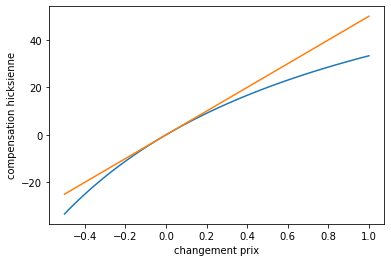

In [40]:
plt.figure()
plt.plot(dpxs,cmps,label='exacte')
plt.plot(dpxs,cmp_approx,label='approximation')
plt.xlabel('changement prix')
plt.ylabel('compensation hicksienne')
plt.show()